# Objective
Menentukan status seseorang apakah jomblo atau pacaran berdasarkan jumlah mantan dan tinggi badan.

# Sample Dataset

In [1]:
import pandas as pd

status = {
    "tinggi": [158, 170, 183, 155, 163, 180, 158, 178],
    "mantan": [3, 6, 1, 5, 10, 2, 2, 7],
    "status": ["jomblo", "jomblo", "pacaran", "pacaran", "jomblo", "pacaran", "jomblo", "pacaran"]
}

status_df = pd.DataFrame(status)
status_df

,tinggi,mantan,status
0,158,3,jomblo
1,170,6,jomblo
2,183,1,pacaran
3,155,5,pacaran
4,163,10,jomblo
5,180,2,pacaran
6,158,2,jomblo
7,178,7,pacaran


# Visualize Data

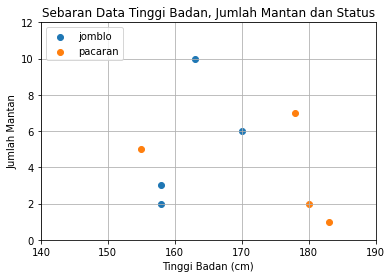

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for status, data in status_df.groupby('status'):
    ax.scatter(data["tinggi"], data["mantan"], label=status)
    
plt.legend(loc='upper left')
plt.xlim(140, 190)
plt.ylim(0, 12)
plt.title("Sebaran Data Tinggi Badan, Jumlah Mantan dan Status")
plt.xlabel("Tinggi Badan (cm)")
plt.ylabel("Jumlah Mantan")
plt.grid(True)
plt.show()

# Preprocessing Dataset

## Split features and target

In [3]:
import numpy as np

X_train = np.array(status_df[["tinggi", "mantan"]])
y_train = np.array(status_df["status"])

print(f"X_train:\n{X_train}\n")
print(f"y_train:\n{y_train}")

X_train:
[[158   3]
 [170   6]
 [183   1]
 [155   5]
 [163  10]
 [180   2]
 [158   2]
 [178   7]]

y_train:
['jomblo' 'jomblo' 'pacaran' 'pacaran' 'jomblo' 'pacaran' 'jomblo'
 'pacaran']


## Label Binarizer

In [4]:
from sklearn.preprocessing import LabelBinarizer

binarizer = LabelBinarizer()
y_train = binarizer.fit_transform(y_train)
print(f"New y_train:\n{y_train}")

New y_train:
[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]]


In [5]:
y_train = y_train.flatten()

# KNN (K-Nearest Neighbors) Classification Model
- Melakukan klasifikasi dengan cara menghitung *distance* antara *datapoint* baru dengan *datapoint-datapoint* terdekat yang ada disekitar *datapoint* yang diprediksi kelasnya.
- Salah satu cara menghitung *distance* dapat menggunakan *Euclidean Distance*.
- Jumlah tetangga (*neighbors*) terdekat yang dihitung ditentukan sebelumnya.
- Setelah itu divoting untuk menentukan *datapoint* baru masuk ke kelas yang mana.

## Train Model

In [6]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
knn_model = KNeighborsClassifier(n_neighbors=K)
knn_model.fit(X_train, y_train);

## Predict with Trained Model

In [7]:
tinggi_badan_gebetan = 170
jumlah_mantan_gebetan = 1

tinggi_badan_aku = 165
jumlah_mantan_aku = 1 

X_new = np.array([[tinggi_badan_gebetan, jumlah_mantan_gebetan],
                  [tinggi_badan_aku, jumlah_mantan_aku]])
X_new

array([[170,   1],
       [165,   1]])

In [8]:
y_new = knn_model.predict(X_new)
y_new

array([1, 0])

In [9]:
binarizer.inverse_transform(y_new)

array(['pacaran', 'jomblo'], dtype='<U7')

## Visualize KNN Model

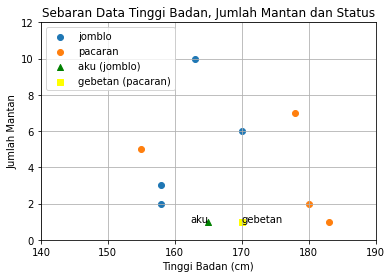

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for status, data in status_df.groupby('status'):
    ax.scatter(data["tinggi"], data["mantan"], label=status)

plt.scatter(tinggi_badan_aku,
            jumlah_mantan_aku,
            marker="^",
            color="green",
            label="aku (jomblo)")

plt.text(tinggi_badan_aku, jumlah_mantan_aku, 'aku', horizontalalignment='right')

plt.scatter(tinggi_badan_gebetan,
            jumlah_mantan_gebetan,
            marker="s",
            color="yellow",
            label="gebetan (pacaran)")

plt.text(tinggi_badan_gebetan, jumlah_mantan_gebetan, 'gebetan')


plt.legend(loc='upper left')
plt.xlim(140, 190)
plt.ylim(0, 12)
plt.title("Sebaran Data Tinggi Badan, Jumlah Mantan dan Status")
plt.xlabel("Tinggi Badan (cm)")
plt.ylabel("Jumlah Mantan")
plt.grid(True)
plt.show()

## Distance Calculation (Euclidean Distance)
$distance = \sqrt{(t_1 - t_2)^2 + (b_1 - b_2)^2}$

### Aku

In [11]:
aku = np.array([tinggi_badan_aku, jumlah_mantan_aku])
aku

array([165,   1])

In [12]:
from scipy.spatial.distance import euclidean

distance_aku = [euclidean(aku, d) for d in X_train]
distance_aku

[7.280109889280518,
 7.0710678118654755,
 18.0,
 10.770329614269007,
 9.219544457292887,
 15.033296378372908,
 7.0710678118654755,
 14.317821063276353]

In [13]:
status_df["distance"] = distance_aku
status_df.sort_values(["distance"])

,tinggi,mantan,status,distance
1,170,6,jomblo,7.071068
6,158,2,jomblo,7.071068
0,158,3,jomblo,7.280110
4,163,10,jomblo,9.219544
3,155,5,pacaran,10.770330
7,178,7,pacaran,14.317821
5,180,2,pacaran,15.033296
2,183,1,pacaran,18.000000


### Gebetan

In [14]:
gebetan = np.array([tinggi_badan_gebetan, jumlah_mantan_gebetan])
gebetan

array([170,   1])

In [15]:
distance_gebetan = [euclidean(gebetan, d) for d in X_train]
distance_gebetan

[12.165525060596439,
 5.0,
 13.0,
 15.524174696260024,
 11.40175425099138,
 10.04987562112089,
 12.041594578792296,
 10.0]

In [16]:
status_df["distance"] = distance_gebetan
status_df.sort_values(["distance"])

,tinggi,mantan,status,distance
1,170,6,jomblo,5.000000
7,178,7,pacaran,10.000000
5,180,2,pacaran,10.049876
4,163,10,jomblo,11.401754
6,158,2,jomblo,12.041595
0,158,3,jomblo,12.165525
2,183,1,pacaran,13.000000
3,155,5,pacaran,15.524175


# Evaluate Model

## Testing Set

In [17]:
X_test = np.array([[150, 1],
                  [167, 4],
                  [180, 2],
                  [155, 5]])

y_test = np.array(["jomblo", "pacaran", "pacaran", "jomblo"])
y_test = binarizer.fit_transform(y_test)
print(f"X_test:\n{X_test}\n")
print(f"y_test:\n{y_test}")

X_test:
[[150   1]
 [167   4]
 [180   2]
 [155   5]]

y_test:
[[0]
 [1]
 [1]
 [0]]


## Predict with test dataset

In [18]:
y_pred = knn_model.predict(X_test)

In [19]:
y_pred

array([0, 0, 1, 0])

In [20]:
binarizer.inverse_transform(y_pred)

array(['jomblo', 'jomblo', 'pacaran', 'jomblo'], dtype='<U7')

# Metrics Evaluation

## Confusion Matrix
- Menjelaskan seberapa besar kebingungan modell dalam melakukan prediksi yang direpresentasikan dengan TP (*True Positive*), TN (*True Negative*), FP (*False Positive*), dan FN (*False Negative*).
- *True Positive* adalah model memprediksi positif dan secara actual benar-benar positif. Prediksi model dengan keadaan sebenarnya sesuai dalam hal ini positif.
- *True Negative* adalah model memprediksi negatif dan secara actual benar-benar negatif. Prediksi model dengan keadaan sebenarnya sesuai dalam hal ini negatif.
- *False Positive* adalah model memprediksi positif, tetapi kenyatannya negatif. Prediksi model dengan keadaan sebenarnya tidak sesuai dalam hal ini seharusnya negatif.
- *False Negative* adalah model memprediksi negatif, tetapi kenyatannya positif. Prediksi model dengan keadaan sebenarnya tidak sesuai dalam hal ini seharusnya positif.

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, y_pred)
print(f"- FP (True Positive)  : {confusion_matrix[1, 1]}")
print(f"- FP (False Positive) : {confusion_matrix[0, 1]}")
print(f"- TN (True Negative)  : {confusion_matrix[0, 0]}")
print(f"- FN (False Negative) : {confusion_matrix[1, 0]}")

- FP (True Positive)  : 1
- FP (False Positive) : 0
- TN (True Negative)  : 2
- FN (False Negative) : 1


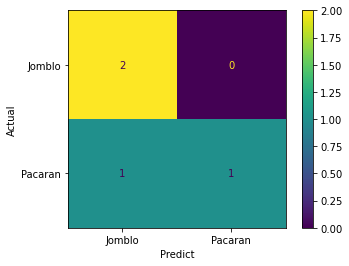

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=knn_model.classes_)
disp.plot()
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.xticks([0, 1], ["Jomblo", "Pacaran"])
plt.yticks([0, 1], ["Jomblo", "Pacaran"])
plt.show()

## Accuracy
- *Accuracy* adalah persentase model memprediksi dengan benar untuk setiap kelas.
- Kekurangan: apabila jumlah *dataset* setiap *class* tidak seimbang, maka hasil akurasi tidak adil.

- $accuracy = \frac{TP\ +\ TN}{TP\ +\ TN\ +\ FP\ +\ FN}$

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.75


## Precision
- Dari data yang diprediksi positif, berapa banyak yang benar.
- Digunakan apabila evaluasi fokus untuk menurunkan FP (*False Positive*).
- $precision = \frac{TP}{TP\ +\ FP}$

In [24]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

Precision: 1.0


## Recall
- Istilah lainnya adalah *Sensitivity*.
- Dari data yang berlabel positif, berapa banyak yang diprediksi benar oleh model.
- Digunakan apabila evaluasi fokus untuk menurunkan FN (*False Negative*).
- $recall = \frac{TP}{TP\ +\ FN}$

In [25]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f"Precision: {recall}")

Precision: 0.5


## F1-Score
- Nilai hramonik antara Precision dan Recall.
- $F1 = 2 \times \frac{Precision\ \times\ Recall}{Precision\ +\ Recall}$

In [26]:
from sklearn.metrics import f1_score

f1_score= f1_score(y_test, y_pred)
print(f"F1: {f1_score}")

F1: 0.6666666666666666


## Classification Report
Memaparkan laporan berupa metrik evaluasi dalam bentuk tabel. Informasi yang disajikan lebih lengkap untuk setiap *class* yang diprediksi.

In [27]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{classification_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



## Matthews Correlation Coefficient (MCC)
- Metrik evaluasi yang dikhususkan untuk kasus *binary* dan *multiclass classification*.
- $MCC = \frac{TP\ \times\ TN\ +\ FP\ \times\ FN}{ \sqrt{ (TP\ +\ FP)\ \times\ (TP\ +\ FN)\ \times\ (TN\ +\ FP)\ \times\ (TN\ +\ FN)}}$

In [28]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print(f"MCC: {mcc}")

MCC: 0.5773502691896258
